In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#from sklearn import datasets
sess = tf.Session()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
from netCDF4 import Dataset
rootgrp1 = Dataset("../data/cal_cams_gfas.nc", "r", format="NETCDF4")
frpfire = rootgrp1.variables["frpfire"]

In [4]:
rootgrp2 = Dataset("../data/cal_era5_2008.nc", "r", format="NETCDF4")
swvl1 = rootgrp2.variables["u10"]
swvl2 = rootgrp2.variables["v10"]

In [5]:
x1_vals = np.array(swvl1[0:365][:][:])
x2_vals = np.array(swvl2[0:365][:][:])
x_vals = np.sqrt(x1_vals*x1_vals + x2_vals*x2_vals)
    
y_vals = np.array(frpfire[0:365][:][:])
#x_vals = x_vals.reshape(-1)
#y_vals = y_vals.reshape(-1)
print(x_vals.shape)
print(y_vals.shape)
print(np.amin(x_vals))
print(np.amin(y_vals))
print(np.amax(x_vals))
print(np.amax(y_vals))
print(np.argwhere(np.isnan(x_vals)))
print(np.argwhere(np.isnan(y_vals)))

(365, 101, 101)
(365, 101, 101)
0.001467193349172275
3.552713678800501e-15
21.47593230635589
30.09349274343672
[]
[]


In [5]:
learning_rate = 0.001
batch_size = 101*101
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [6]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [7]:
loss = tf.reduce_mean(tf.square(y_target - model_output))

In [8]:
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [9]:
loss_vec = []
for i in range(365):
    #rand_index = np.random.choice(365)
    rand_index = i
    x1 = x_vals[rand_index][:][:].reshape(101*101,1)
    y  = y_vals[rand_index][:][:].reshape(101*101,1)
    sess.run(train_step, feed_dict={x_data: x1, y_target:y})
    temp_loss = sess.run(loss, feed_dict={x_data: x1, y_target: y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ''' + str(temp_loss))

Step #25 A = [[-0.29741153]]b = [[0.95154196]]
Loss = 2.7205548
Step #50 A = [[-0.17239685]]b = [[0.94646794]]
Loss = 0.3765269
Step #75 A = [[-0.15020107]]b = [[0.9288365]]
Loss = 0.4375207
Step #100 A = [[-0.13046186]]b = [[0.9095318]]
Loss = 0.3378051
Step #125 A = [[-0.11503422]]b = [[0.8906114]]
Loss = 0.41979158
Step #150 A = [[-0.11411037]]b = [[0.86820686]]
Loss = 0.41146672
Step #175 A = [[-0.10906481]]b = [[0.8470522]]
Loss = 0.3766337
Step #200 A = [[-0.12416986]]b = [[0.8231209]]
Loss = 0.38410768
Step #225 A = [[-0.11756846]]b = [[0.80373186]]
Loss = 0.34684768
Step #250 A = [[-0.11815596]]b = [[0.7836805]]
Loss = 0.28434503
Step #275 A = [[-0.13516517]]b = [[0.76259726]]
Loss = 0.27376035
Step #300 A = [[-0.12247662]]b = [[0.74625975]]
Loss = 0.25296697
Step #325 A = [[-0.12190545]]b = [[0.7298299]]
Loss = 0.24726024
Step #350 A = [[-0.11908155]]b = [[0.71383536]]
Loss = 0.19714178


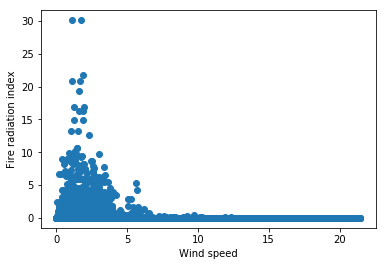

In [6]:
import matplotlib.pyplot as plt
#colors = np.random.rand(size)
x0 = x_vals.reshape(-1)
y0 = y_vals.reshape(-1)
plt.scatter(x0, y0)
plt.xlabel("Wind speed")
plt.ylabel("Fire radiation index")
plt.show()